## Problem Statement

You are a data scientist at a retail consulting firm. You have been provided with a dataset named **"retail_store_sales_data.csv"**, which includes detailed records of daily sales for a retail store over a two-year period. The dataset comprises the following columns:

- **date:** The specific date for each sales record.
- **day_of_week:** The day of the week corresponding to each date.
- **sales_amount (usd):** : The total sales amount in USD recorded on each day.

**Import Necessary Libraries**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as st
import numpy as np

### Task1: Data Import

1. Import the data from the "retail_store_sales_data.csv" file.
2. display the number of rows and columns. 
3. Display the first few rows of the dataset to get an overview.


In [2]:
df = pd.read_csv("retail_store_sales_data.csv")
print(df.shape)
df.head()

(731, 3)


,date,day_of_week,sales_amount (usd)
0,01-01-2020,Wednesday,1212
1,02-01-2020,Thursday,1261
2,03-01-2020,Friday,596
3,04-01-2020,Saturday,696
4,05-01-2020,Sunday,1434


### Task2: Histogram Plot of Sales Amounts

1. Create the histogram plot for the 'sales_amount (usd)' column

<Axes: xlabel='sales_amount (usd)', ylabel='Count'>

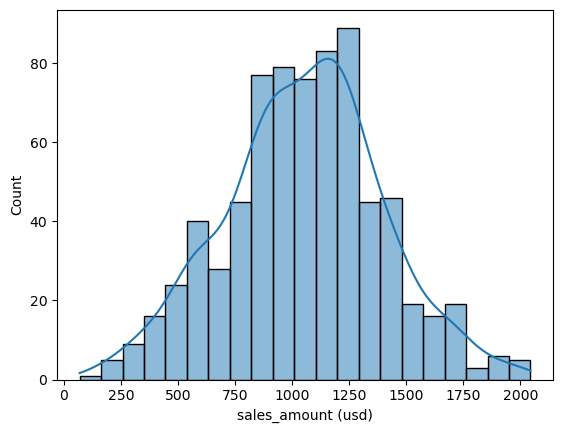

In [3]:
#plot the histogram plot

sns.histplot(df['sales_amount (usd)'], kde=True)

### Task 3: Computing Population Standard Deviation

- **Determine Standard Deviation:** Calculate the population standard deviation for the 'Sales_Amount (usd)' column. This is helpful in the accurate creation of confidence intervals in subsequent analyses.

In [4]:
std_dev_population = round(df['sales_amount (usd)'].std())

print("Standatd Deviation: ", std_dev_population)

Standatd Deviation:  345


### Task4: Create Sample Data

- Create a sample dataset consisting of 100 data points from the 'Sales_Amount (usd)' column.
- Calculate the mean for this sample. 


In [5]:
#def sample size
SAMPLE_SIZE = 100

#get the sample dataframe
sample = df.sample(SAMPLE_SIZE, random_state=100)

sample.head()

,date,day_of_week,sales_amount (usd)
184,03-07-2020,Friday,846
535,19-06-2021,Saturday,970
299,26-10-2020,Monday,925
221,09-08-2020,Sunday,709
152,01-06-2020,Monday,1163


In [6]:
#calculate the mean

mean_sample = sample['sales_amount (usd)'].mean()

mean_sample

987.67

### Task 5: Estimating Population Mean at Various Confidence Levels

Confidence Interval Calculations: Using the sample data, estimate the population mean for 'Sales_Amount (usd)' at different confidence levels. Specifically, calculate the confidence intervals for the population mean at the following levels:

    - 60% Confidence Level
    - 82% Confidence Level
    - 98% Confidence Level

- **60% Confidence Level**

In [8]:
#1. 60% Confidence Level

#get the z-score values
final_probability = 0.60 + ((1-0.60) / 2)     
z_score_60_confidence = st.norm.ppf(final_probability)

#calculate margin of error:
margin_of_error = z_score_60_confidence*(std_dev_population/np.sqrt(SAMPLE_SIZE))

#calculate the intervals
lower = mean_sample - margin_of_error
upper = mean_sample + margin_of_error

print(f"60% confidence intervals - lower: {lower}, upper: {upper}")
print(final_probability,z_score_60_confidence)

60% confidence intervals - lower: 958.6340674417344, upper: 1016.7059325582655
0.8 0.8416212335729143


- **82% Confidence Level**

In [9]:
#2. 82% Confidence Level

#get the z-score values
final_probability = 0.82 + ((1-0.82) / 2)  
z_score_82_confidence = st.norm.ppf(final_probability) 

#calculate margin of error:
margin_of_error = z_score_82_confidence*(std_dev_population/np.sqrt(SAMPLE_SIZE))

#calculate the intervals
lower = mean_sample - margin_of_error
upper = mean_sample + margin_of_error

print(f"82% confidence intervals - lower: {lower}, upper: {upper}")
print(final_probability)

82% confidence intervals - lower: 941.4139513376875, upper: 1033.9260486623125
0.9099999999999999


- **98% Confidence Level**

In [17]:
#3. 98% Confidence Level

#get the z-score values
final_probability = 0.98 + ((1-0.98) / 2)  
z_score_98_confidence = st.norm.ppf(final_probability) #0.98 [98% confidence level] 

#calculate margin of error:
margin_of_error = z_score_98_confidence*(std_dev_population/np.sqrt(SAMPLE_SIZE))

#calculate the intervals
lower = mean_sample - margin_of_error
upper = mean_sample + margin_of_error

print(f"98% confidence intervals - lower: {lower}, upper: {upper}")

98% confidence intervals - lower: 907.410998345591, upper: 1067.929001654409
